In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_dir = "assets/optionB"
data_dir = pathlib.Path(dataset_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1313


In [4]:
batch_size = 32
img_height = 128
img_width = 128

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1313 files belonging to 22 classes.
Using 1051 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1313 files belonging to 22 classes.
Using 262 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['1_abnormal', '1_normal', '2down_abnormal', '2down_normal', '2up_abnormal', '2up_normal', '3down_abnormal', '3down_normal', '3up_abnormal', '3up_normal', '4_abnormal', '4_normal', '5_abnormal', '5_normal', 'Down_abnormal', 'Down_normal', 'Left_abnormal', 'Left_normal', 'Right_abnormal', 'Right_normal', 'Up_abnormal', 'Up_normal']


In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
num_classes = 22

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [14]:
# I train with 15 epochs. Takes 4 sec for an epoch => 1 min total time
# but five epochs are also fine for testing.
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
33/33 [==============================] - 4s 118ms/step - loss: 1.7041 - accuracy: 0.5395 - val_loss: 0.3728 - val_accuracy: 0.8893
Epoch 2/30
33/33 [==============================] - 4s 114ms/step - loss: 0.3801 - accuracy: 0.8877 - val_loss: 0.3170 - val_accuracy: 0.9198
Epoch 3/30
33/33 [==============================] - 4s 112ms/step - loss: 0.2080 - accuracy: 0.9363 - val_loss: 0.1201 - val_accuracy: 0.9771
Epoch 4/30
33/33 [==============================] - 4s 112ms/step - loss: 0.1232 - accuracy: 0.9705 - val_loss: 0.1151 - val_accuracy: 0.9656
Epoch 5/30
33/33 [==============================] - 4s 114ms/step - loss: 0.0735 - accuracy: 0.9810 - val_loss: 0.1282 - val_accuracy: 0.9504
Epoch 6/30
33/33 [==============================] - 4s 113ms/step - loss: 0.0800 - accuracy: 0.9772 - val_loss: 0.0884 - val_accuracy: 0.9847
Epoch 7/30
33/33 [==============================] - 4s 115ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0711 - val_accuracy: 0.9847
Epoch 

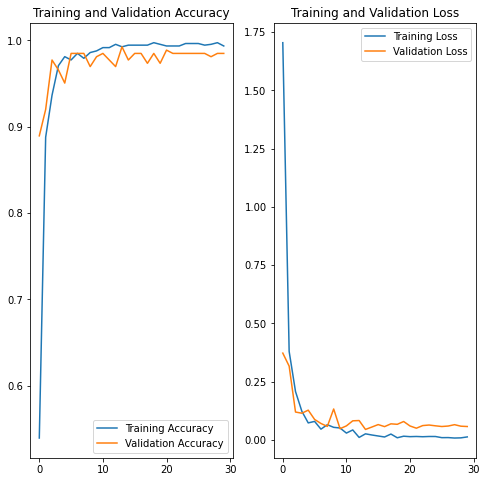

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

image 0 most likely belongs to 1_abnormal with a 100.00 percent confidence.
image 1 most likely belongs to 1_abnormal with a 99.99 percent confidence.
image 2 most likely belongs to 1_abnormal with a 99.73 percent confidence.
image 3 most likely belongs to 1_abnormal with a 100.00 percent confidence.
image 4 most likely belongs to 1_abnormal with a 99.88 percent confidence.
image 5 most likely belongs to 1_abnormal with a 99.88 percent confidence.
image 6 most likely belongs to 1_abnormal with a 99.78 percent confidence.
image 7 most likely belongs to 1_abnormal with a 99.80 percent confidence.
image 8 most likely belongs to 1_abnormal with a 98.62 percent confidence.
image 9 most likely belongs to 1_abnormal with a 99.80 percent confidence.
image 10 most likely belongs to 1_abnormal with a 99.63 percent confidence.
image 11 most likely belongs to 1_abnormal with a 99.91 percent confidence.
image 12 most likely belongs to 1_abnormal with a 99.47 percent confidence.
image 13 most likely

C:\Users\nicesoul\AppData\Local\Temp/ipykernel_14096/1853271019.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


image 23 most likely belongs to 1_abnormal with a 99.99 percent confidence.
image 24 most likely belongs to 1_abnormal with a 99.97 percent confidence.
image 25 most likely belongs to 1_abnormal with a 99.95 percent confidence.
image 26 most likely belongs to 1_abnormal with a 99.82 percent confidence.
image 27 most likely belongs to 1_abnormal with a 99.93 percent confidence.
image 28 most likely belongs to 1_abnormal with a 99.87 percent confidence.
image 29 most likely belongs to 1_abnormal with a 99.85 percent confidence.
image 30 most likely belongs to 1_abnormal with a 99.30 percent confidence.
image 31 most likely belongs to 1_abnormal with a 99.95 percent confidence.
image 32 most likely belongs to 1_abnormal with a 100.00 percent confidence.
image 33 most likely belongs to 1_abnormal with a 99.09 percent confidence.
image 34 most likely belongs to 1_abnormal with a 99.96 percent confidence.
image 35 most likely belongs to 1_abnormal with a 99.99 percent confidence.
image 36 mo

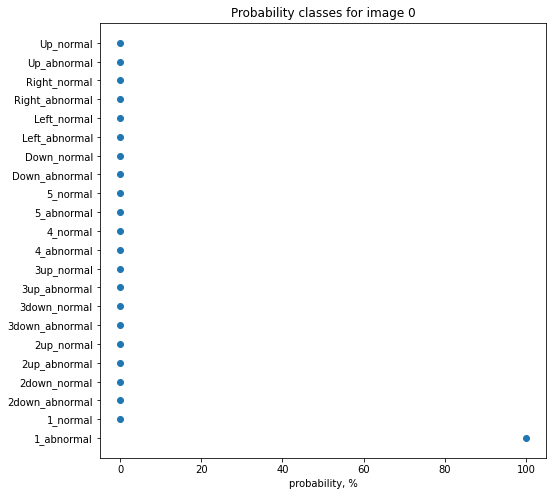

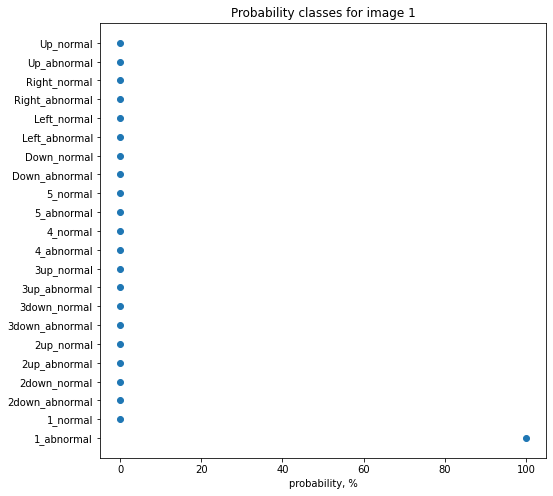

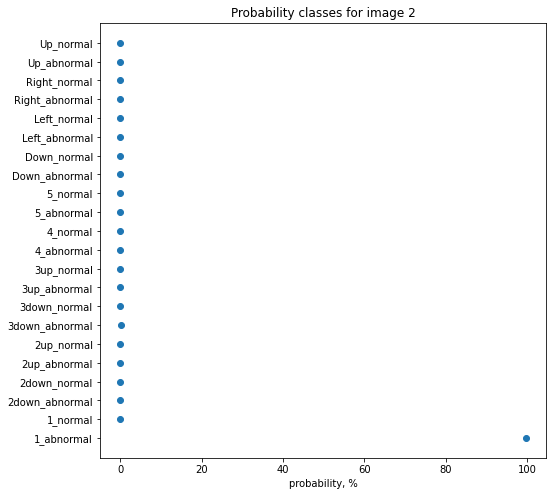

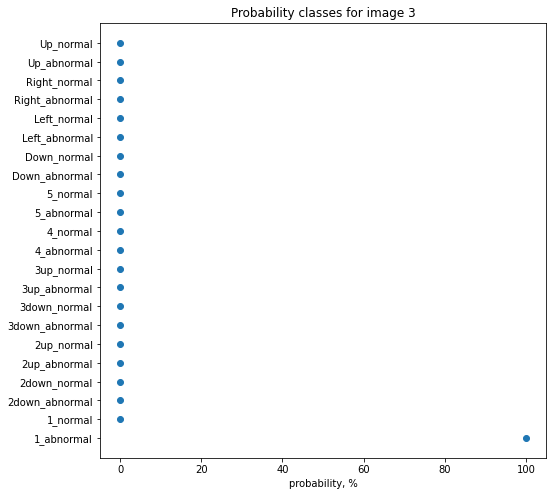

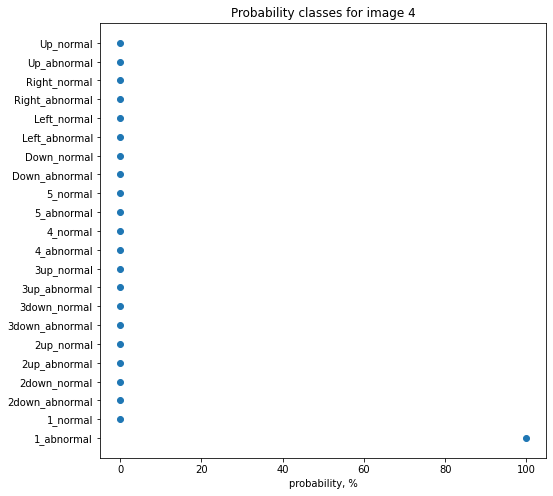

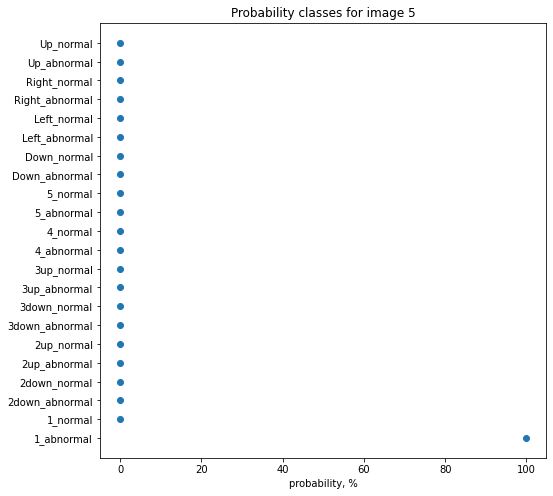

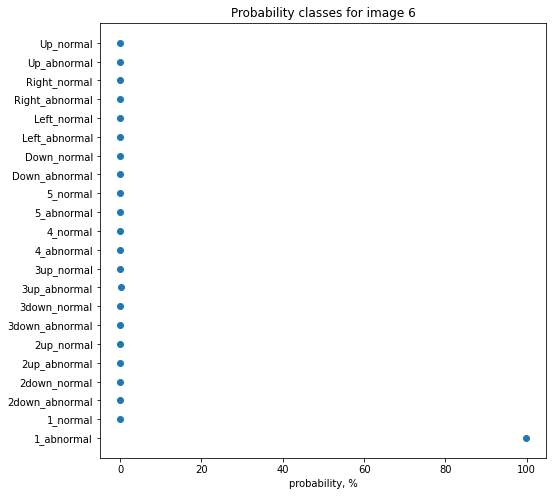

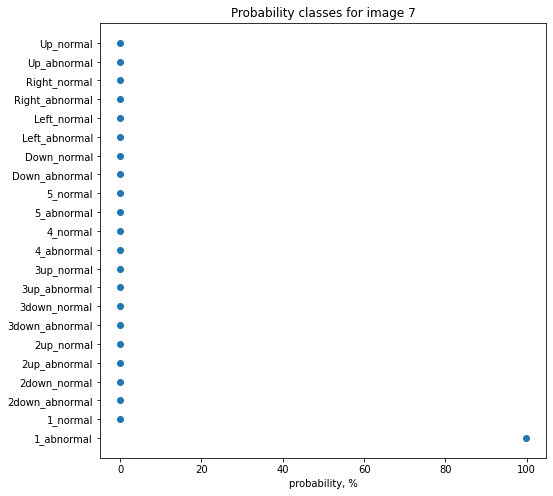

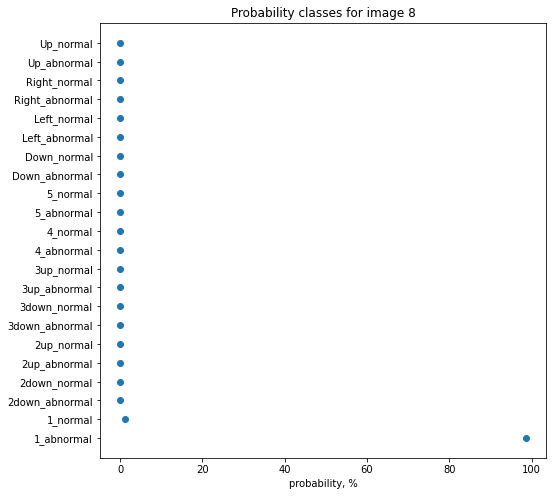

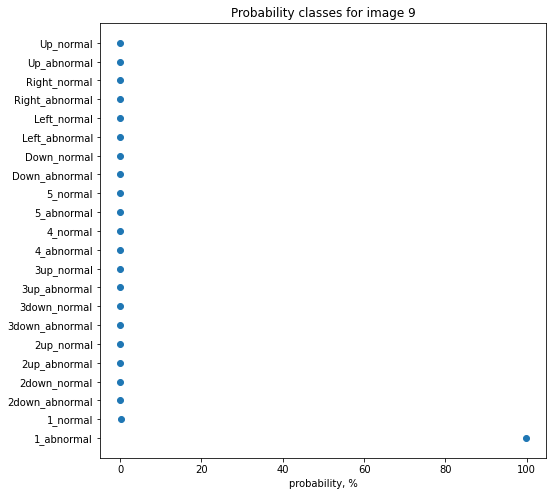

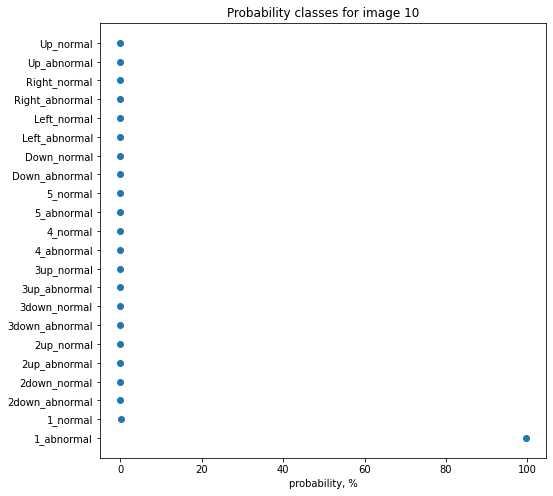

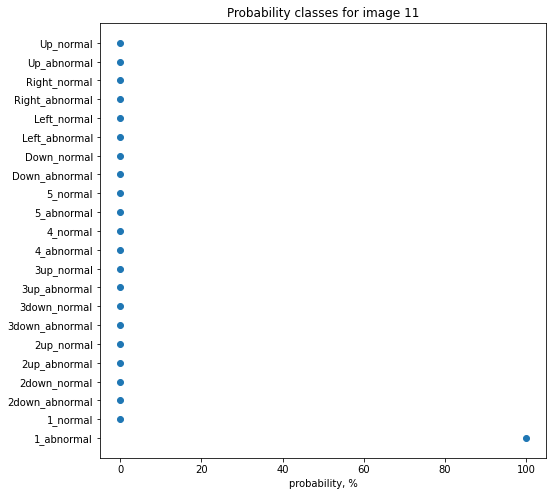

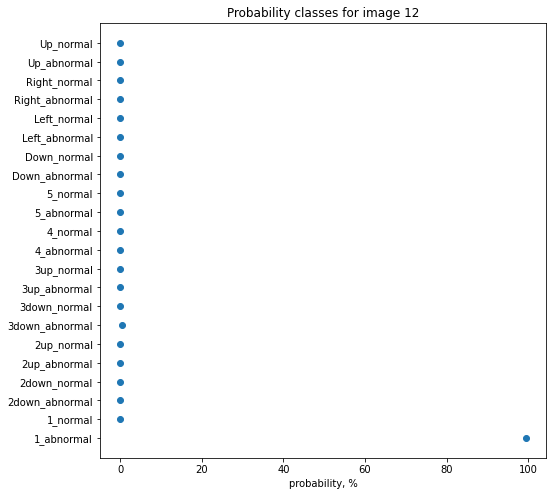

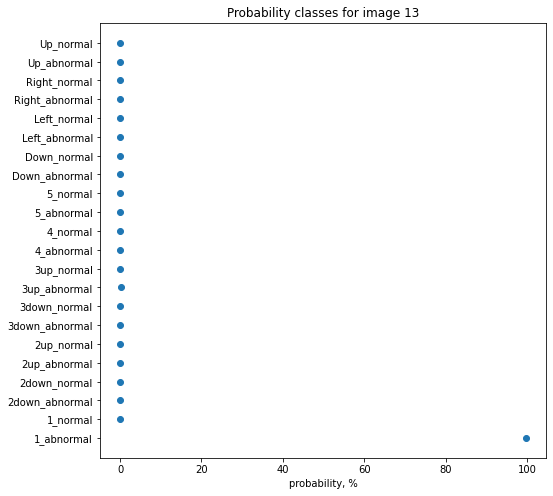

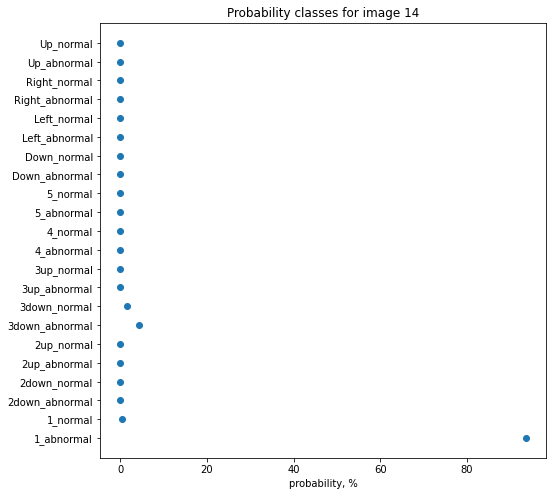

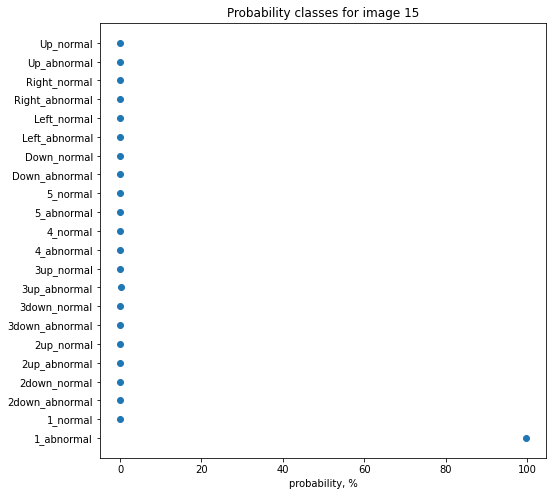

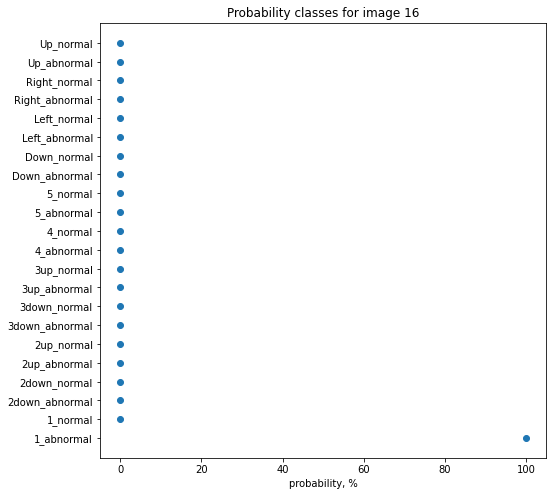

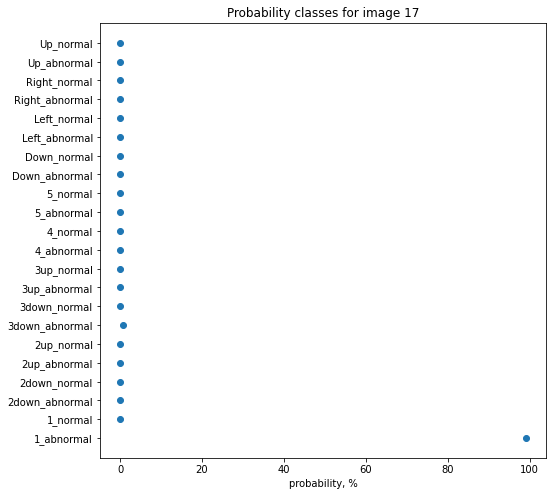

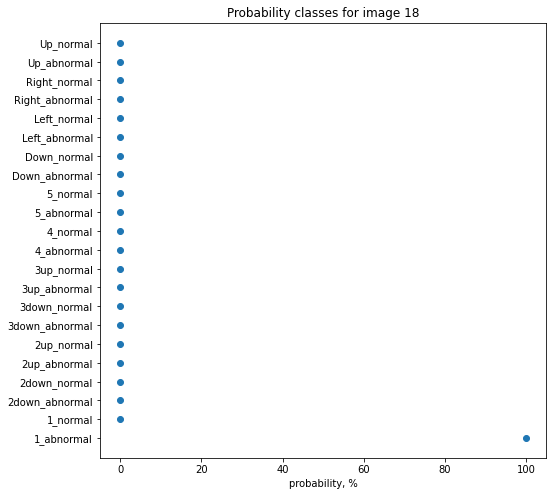

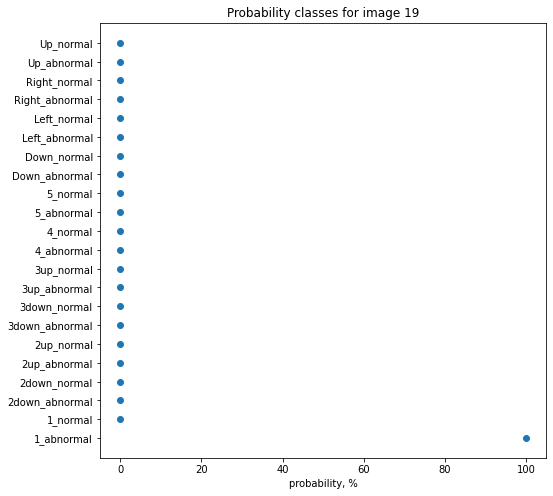

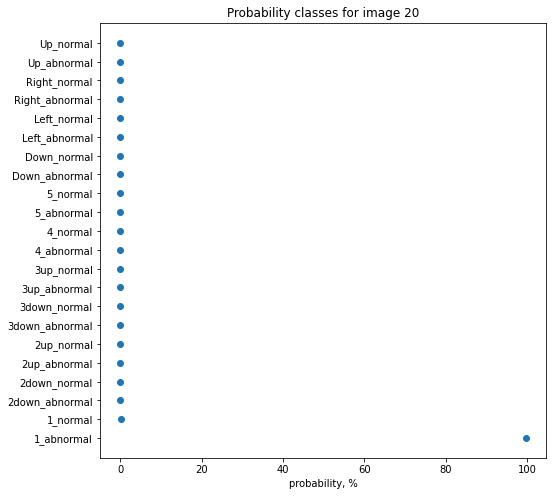

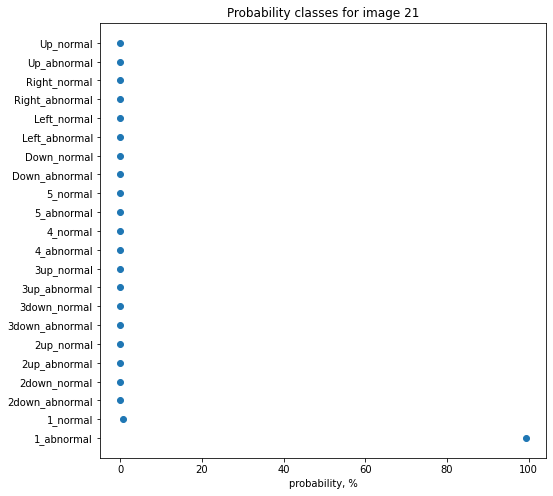

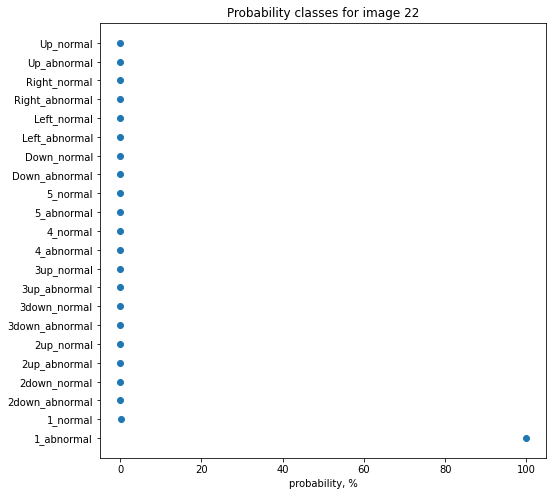

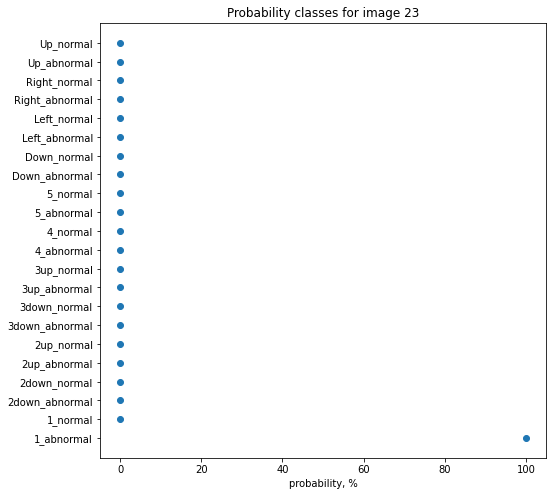

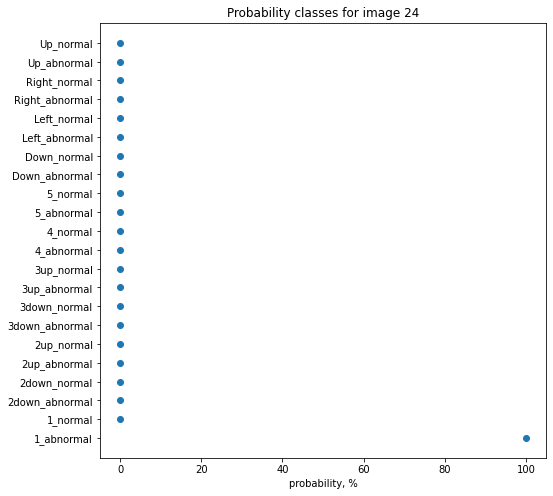

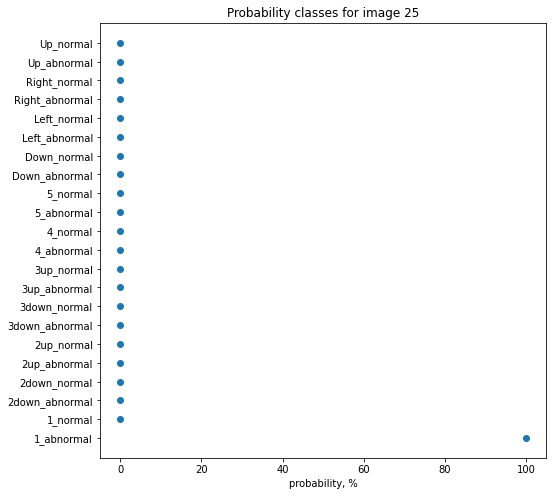

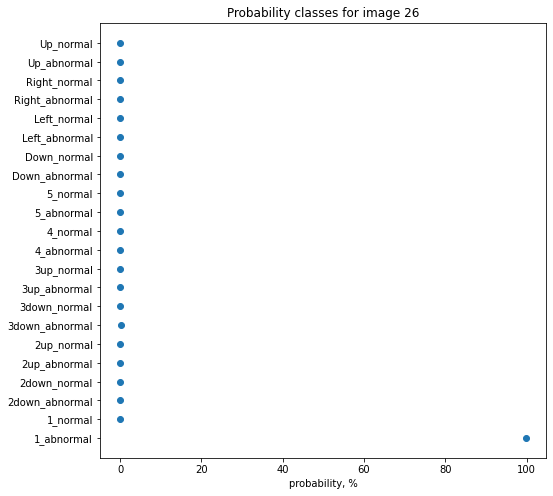

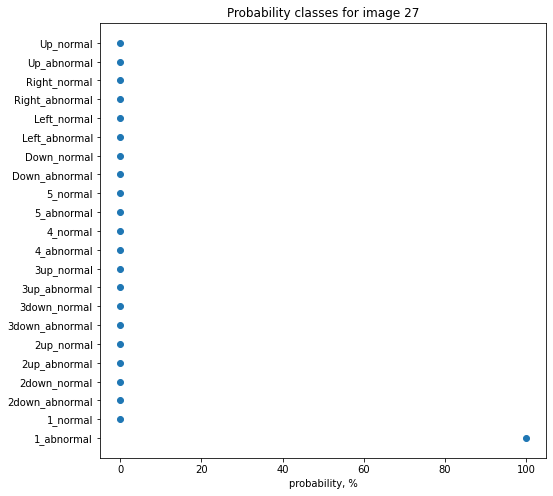

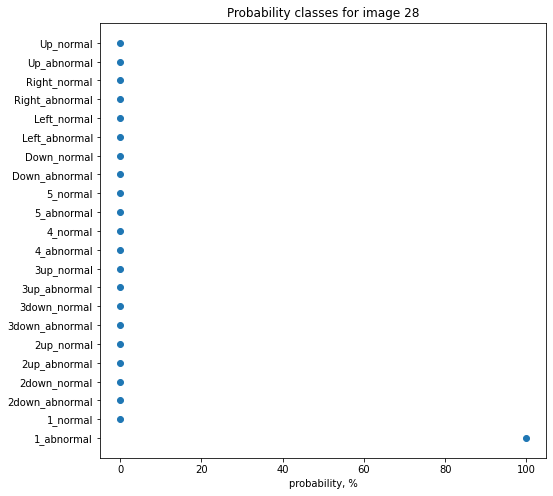

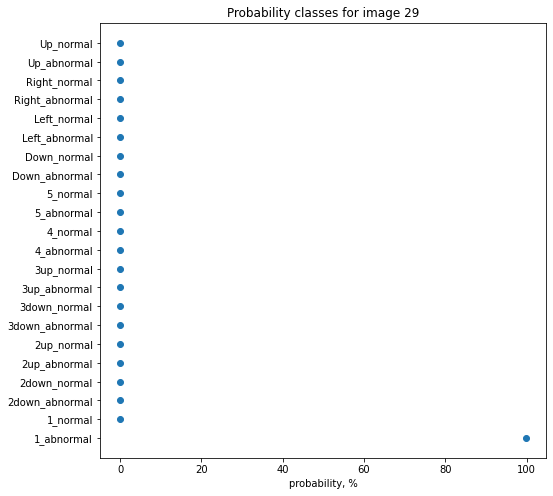

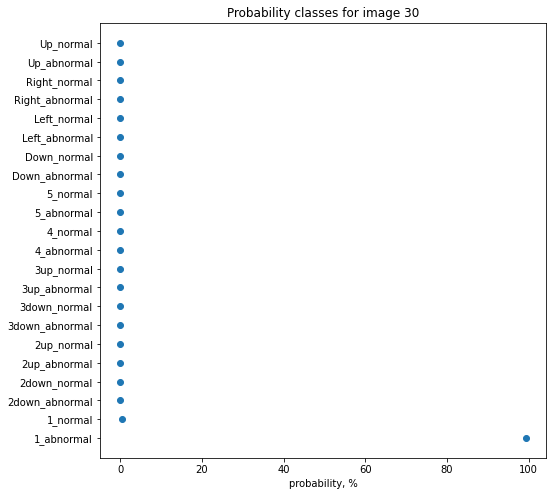

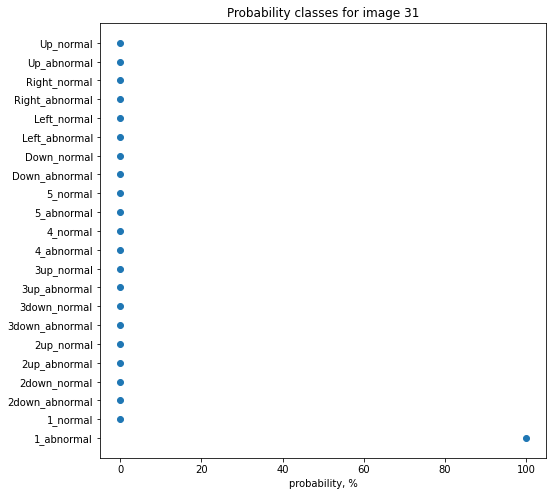

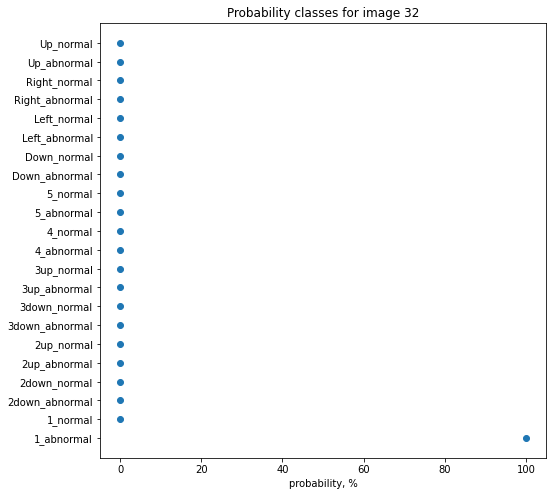

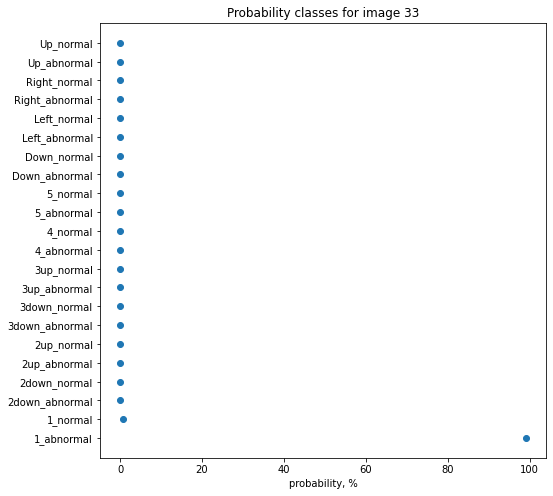

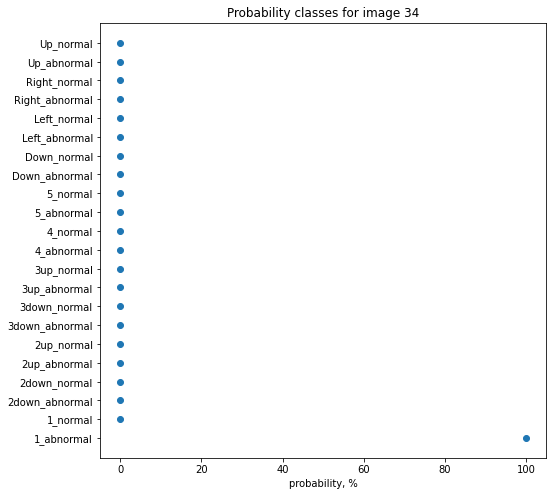

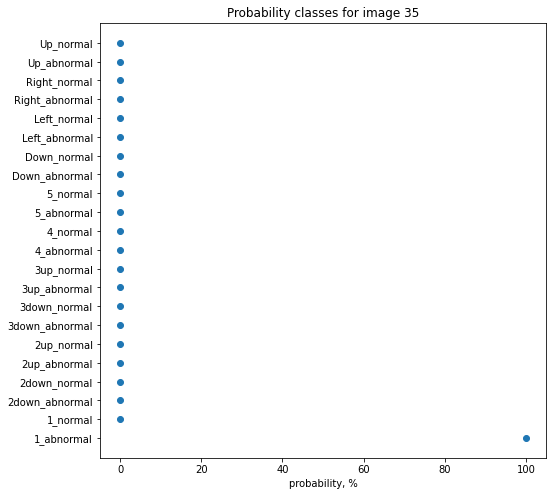

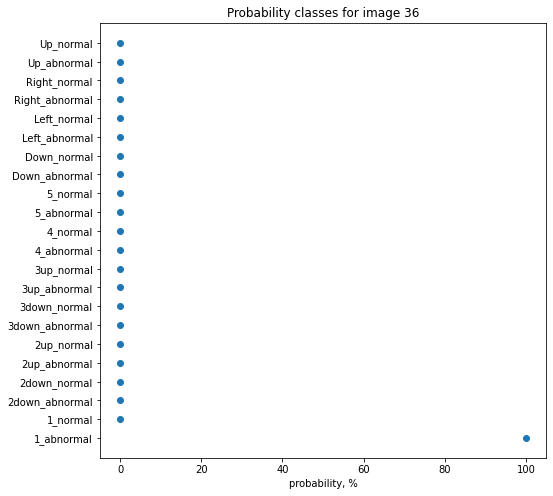

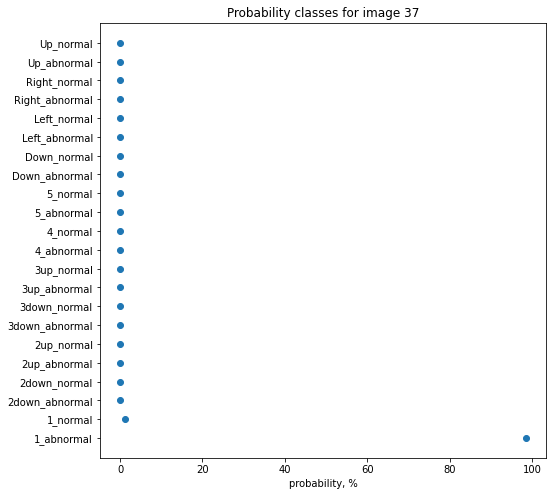

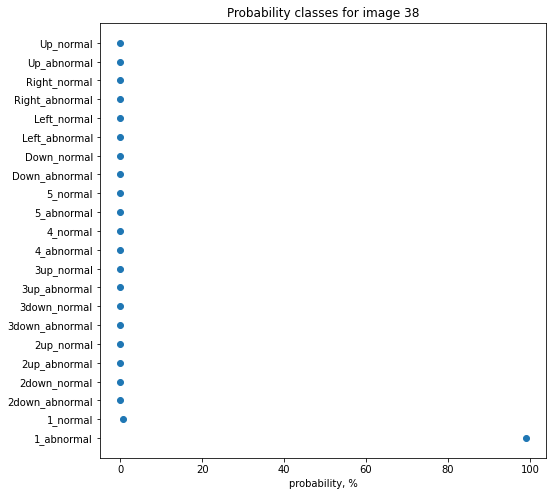

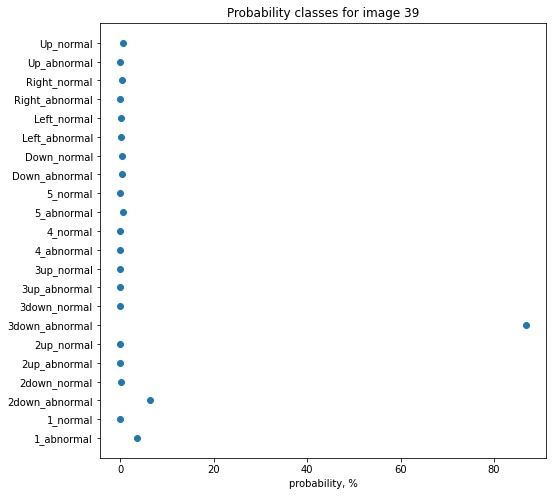

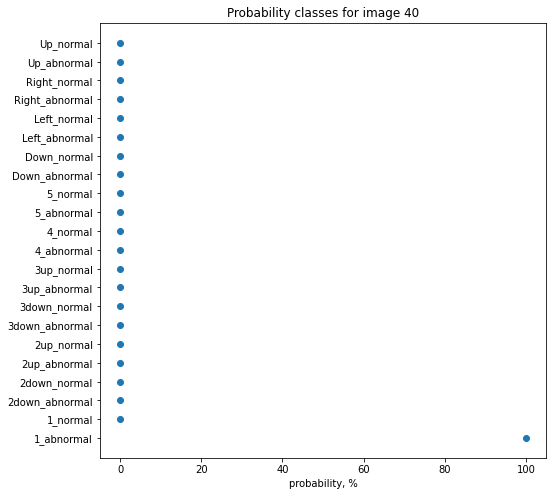

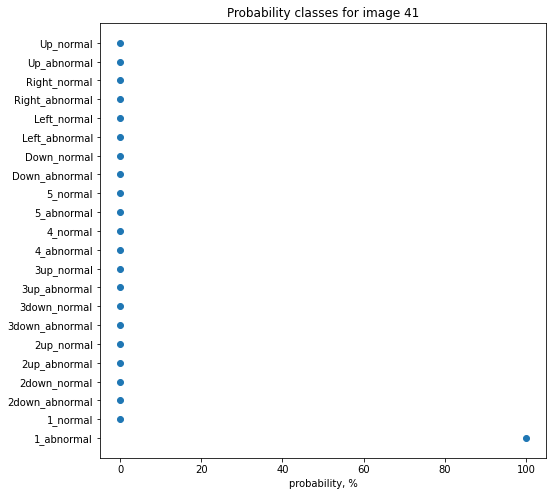

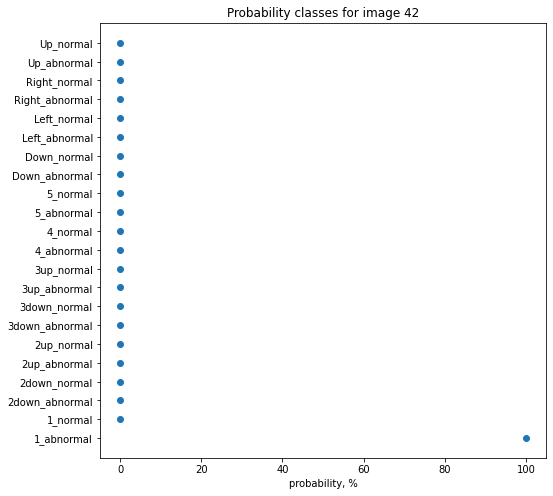

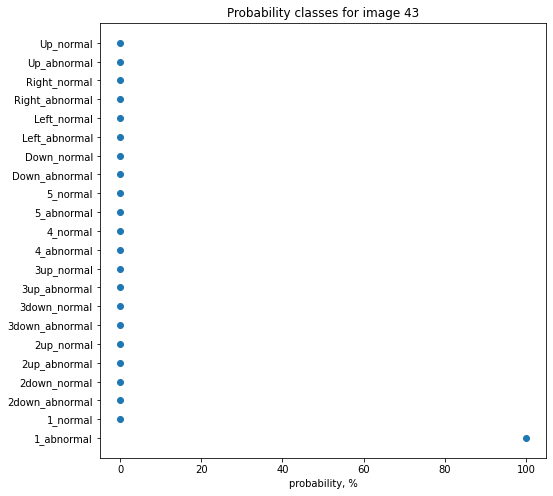

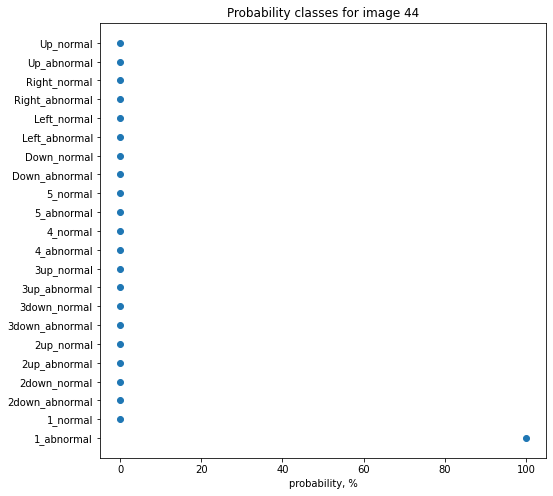

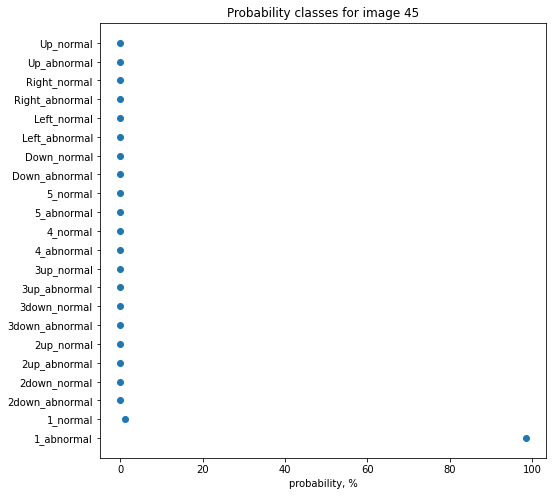

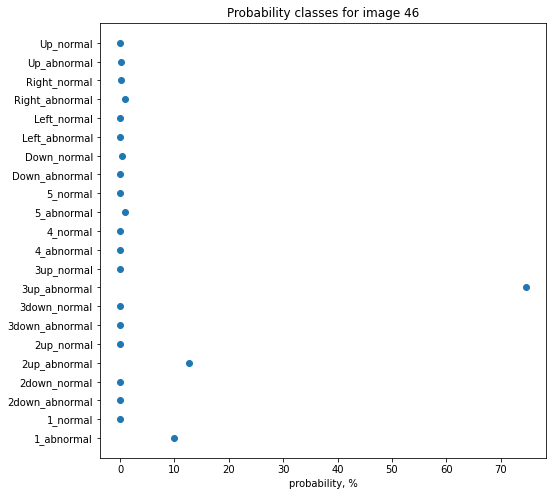

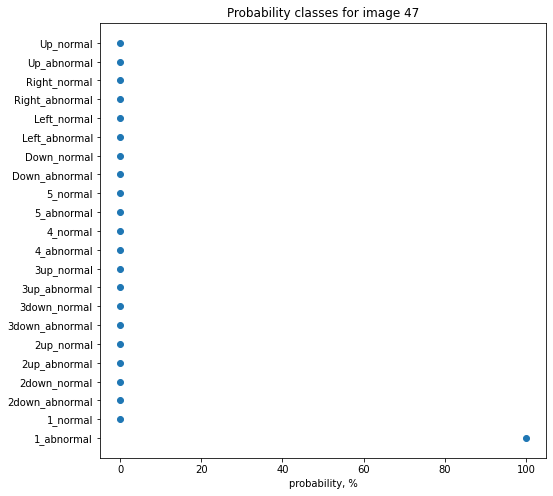

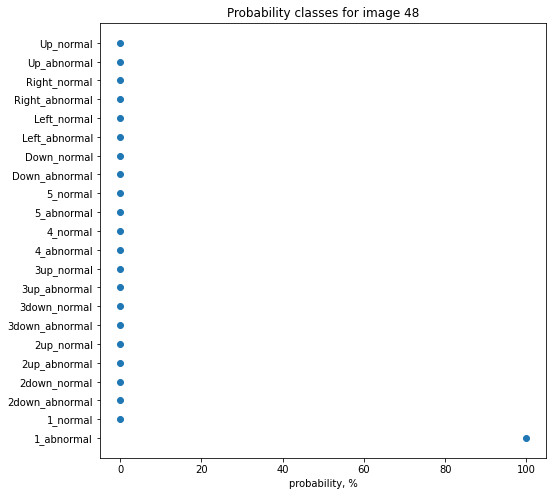

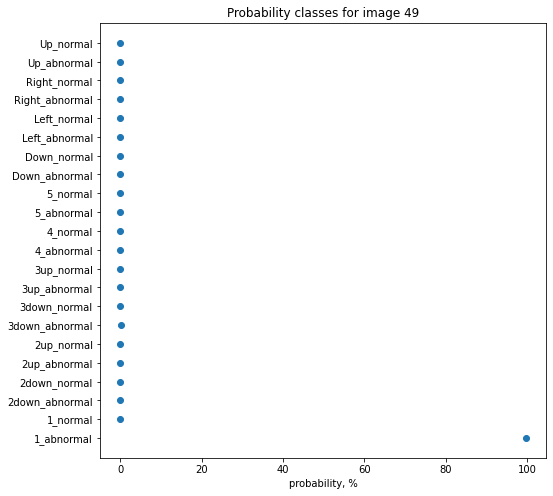

In [17]:



#image_name = "358.jpg"
#image_path = "assets/optionB/3up_abnormal/"

# images from a custom Validation folder
image_path = "assets/Validate/ab_one/"
# image_path = "assets/optionB/5_abnormal/"

for i in range(50):
    image_name = f"Image{i}.jpg"
    
    img = tf.keras.utils.load_img(
    image_path + image_name, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "image {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(i, class_names[np.argmax(score)], 100 * np.max(score))
)
    #print(score)
    plt.figure(figsize=(8, 8))
    plt.scatter(score*100, class_names)
    plt.title(f'Probability classes for image {i}')
    plt.xlabel('probability, %');